In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Salary_Data.csv')
df


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [35]:
df.shape 

(30, 2)

In [36]:
#### Separate the input and output data
x=df[['YearsExperience']]
y=df['Salary']

In [37]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [38]:
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

#### Explore

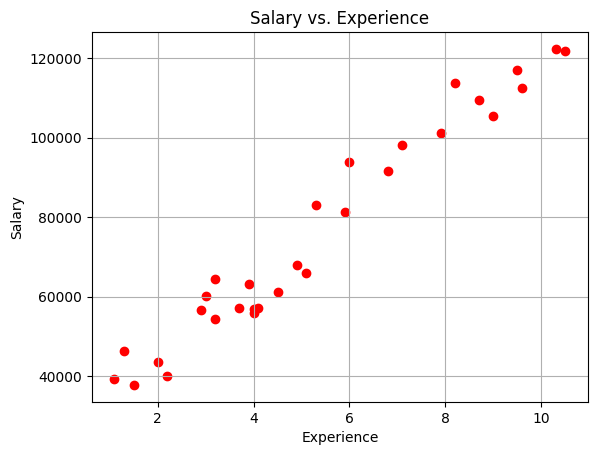

In [39]:
plt.title('Salary vs. Experience')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y,color='red')
           

#### cross validation

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [41]:
x_train.shape 

(22, 1)

In [42]:
x_test.shape 

(8, 1)

In [43]:
x_train

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5


#### Build the model

In [44]:
from sklearn.linear_model import LinearRegression


In [45]:
regressor=LinearRegression()

In [46]:
regressor.fit(x_train, y_train)

LinearRegression()

In [47]:
regressor.coef_

array([9379.71049195])

In [48]:
#value of c 
regressor.intercept_

26986.691316737248

In [49]:
y_pred=regressor.predict(x_test)


In [50]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [51]:
y_test.values

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794],
      dtype=int64)

In [52]:
result=pd.DataFrame({
    'Actual in dataset ':y_test,
    'predicted by Algo': y_pred
})

In [53]:
result

,Actual in dataset,predicted by Algo
2,37731,41056.257055
28,122391,123597.709384
13,57081,65443.504334
10,63218,63567.562235
26,116969,116093.940990
24,109431,108590.172597
27,112635,117031.912039
11,55794,64505.533285


In [54]:
#### Perdormance Evaluation

In [55]:
#Mean absolute error 
np.mean(abs(y_test -y_pred))

3508.5455930660555

In [56]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3508.5455930660555

In [57]:
#error in percentage 
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.05754512646779697

In [58]:
#R_squared error/accuracy of linearity
regressor.score(x_train,y_train)

0.9395413526983522

In [59]:
regressor.score(x_test,y_test)

0.9779208335417602

In [60]:
regressor.fit(x,y)

LinearRegression()

In [61]:
y_pred=regressor.predict(x)

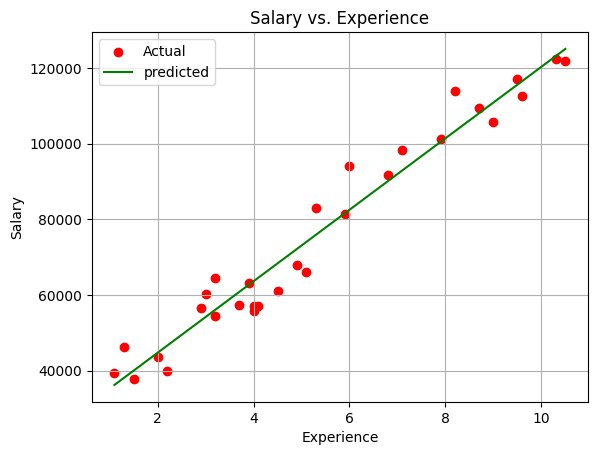

In [62]:
plt.title('Salary vs. Experience')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y,color='red',label='Actual')
plt.plot(x,y_pred,color='g',label='predicted')
plt.legend()

In [63]:
regressor.predict([[12]])

c:\Users\Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139191.74805613])

In [64]:
regressor.predict([[15]])

c:\Users\Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([167541.63502049])

In [65]:
regressor.predict([[0.5]])

c:\Users\Bhargav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30517.1813594])

In [66]:
regressor.coef_[0]*15+regressor.intercept_

167541.6350204948